In [1]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_swc = pd.read_csv('swc_learner_count.csv')

In [3]:
df_swc

,date,year,month,learners,workshops,notes
0,2014,2014,NaN,52,2,2 workshops
1,2015,2015,NaN,123,3,3 workshops
2,Jan-16,2016,1.0,19,1,NaN
3,Mar-16,2016,3.0,25,1,NaN
4,Apr-16,2016,4.0,13,1,NaN
5,Apr-16,2016,4.0,10,1,NaN
6,Jun-16,2016,6.0,19,1,NaN
7,Aug-16,2016,8.0,3,1,NaN
8,Oct-16,2016,10.0,4,1,NaN
9,Dec-16,2016,12.0,12,1,NaN


In [4]:
df_swc.learners.sum()


288

In [5]:
df_swc = pd.read_csv('swc_learner_count.csv', infer_datetime_format=True, parse_dates=['date','month'])

In [6]:
df_swc

,date,year,month,learners,workshops,notes
0,2014,2014,nan,52,2,2 workshops
1,2015,2015,nan,123,3,3 workshops
2,Jan-16,2016,1,19,1,NaN
3,Mar-16,2016,3,25,1,NaN
4,Apr-16,2016,4,13,1,NaN
5,Apr-16,2016,4,10,1,NaN
6,Jun-16,2016,6,19,1,NaN
7,Aug-16,2016,8,3,1,NaN
8,Oct-16,2016,10,4,1,NaN
9,Dec-16,2016,12,12,1,NaN


In [7]:
df_g01 = df_swc.groupby('year').sum()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

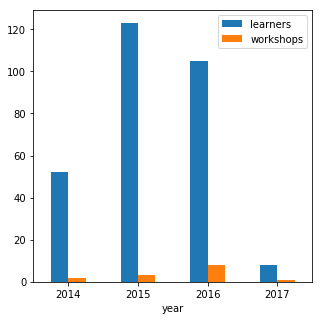

In [8]:
df_g01.plot(kind='bar', figsize=(5,5))
plt.xticks(rotation=0)

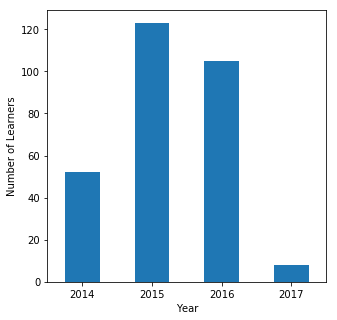

In [9]:
df_g01 = df_swc.groupby(['year']).learners.sum()


df_g01.plot(kind='bar', figsize=(5,5))

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')


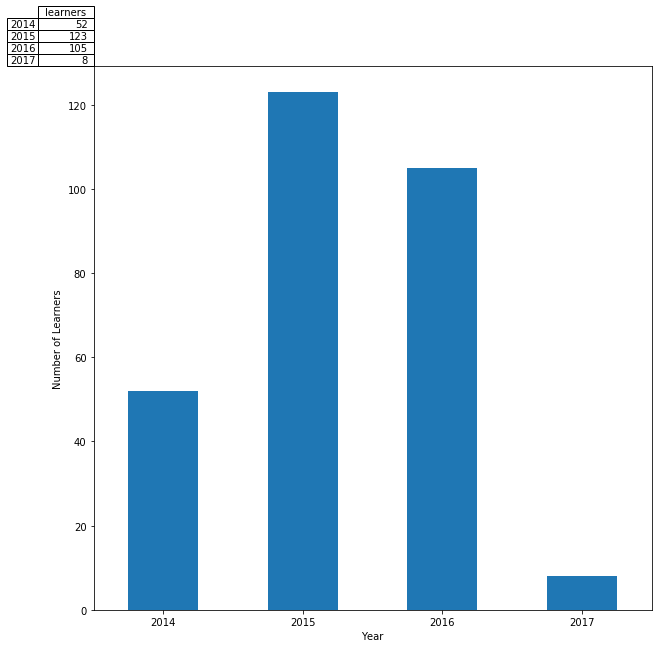

In [10]:
from pandas.tools.plotting import table   

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', ax=axes, figsize=(10,10))
table(axes, df_g01, loc='top left', colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

# fig.savefig('swc_learners_count.png', bbox_inches='tight')

In [28]:
frames = [df_g01, df_g02]
tallies = pd.concat(frames, axis=1)

In [13]:
tallies

,learners,workshops
year,,
2014,52,2
2015,123,3
2016,105,8
2017,8,1


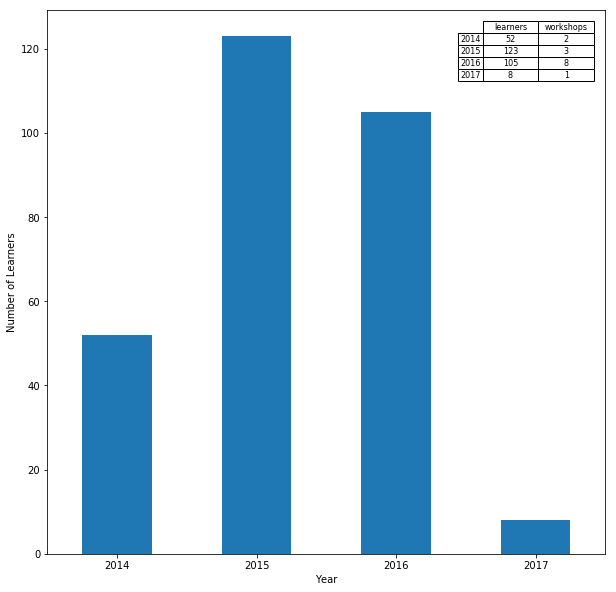

In [53]:

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', ax=axes, figsize=(10,10))
table(axes, tallies, 
      loc='upper right', 
   #   rowLoc = 'center', 
      cellLoc = 'center',
      colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

fig.savefig('swc_learners_count.pdf',dpi=300, bbox_inches='tight')